# Knn Classification 

Importing the dataset

In [1]:
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

Encoding the target feature as factor

In [2]:
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

Splitting the dataset into the Training set and Test set

In [3]:
library(caTools)
set.seed(123)

Warning message:
"package 'caTools' was built under R version 3.4.3"

In [5]:
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Feature Scaling

In [6]:
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

Fitting K-NN to the Training set and Predicting the Test set results

In [10]:
library(class)
y_pred = knn(train = training_set[, -3],
             test = test_set[, -3],
             cl = training_set[, 3],
             k = 5,
             prob = TRUE)
y_pred

[1] 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 [38] 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1
 [75] 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0
attr(,"prob")
  [1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.8000000 1.0000000
  [8] 1.0000000 1.0000000 1.0000000 1.0000000 0.6000000 1.0000000 1.0000000
 [15] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.8000000
 [22] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [29] 1.0000000 1.0000000 1.0000000 0.6000000 1.0000000 1.0000000 1.0000000
 [36] 1.0000000 1.0000000 0.8000000 1.0000000 1.0000000 0.6000000 1.0000000
 [43] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [50] 1.0000000 0.8000000 1.0000000 1.0000000 0.8000000 1.0000000 1.0000000
 [57] 1.0000000 1.0000000 1.0000000 1.0000000 0.8000000 0.8000000 1.0000000
 [64] 0.8000000 0.8000000 0.8000000 0.8000000 1.0000000 0.8000000 0.8000000
 [71] 0.8000000 0.8000000 1.0000000 1.0000000 0.6000000 1.0000000 1.0000000
 [78] 1.0000000 0.8000000 1.0000000 1.0000000 1.0000000 0.8000000 1.0000000
 [85] 1.0000000 1.0000000 0.8333333 1.0000000 0.8000000 0.8000000 0.8000000
 [92] 0.8000000 0.8000000 0.6000000 1.0000000 0.6000000 1.0000000 0.8000000
 [99] 1.0000000 1.0000000
Levels: 0 1

Making the Confusion Matrix

In [18]:
cm = table(test_set[, 3], y_pred)
cm

   
    FALSE TRUE
  0    57    7
  1    10   26

Visualising the Training set results

Warning message:
"package 'ElemStatLearn' was built under R version 3.4.3"

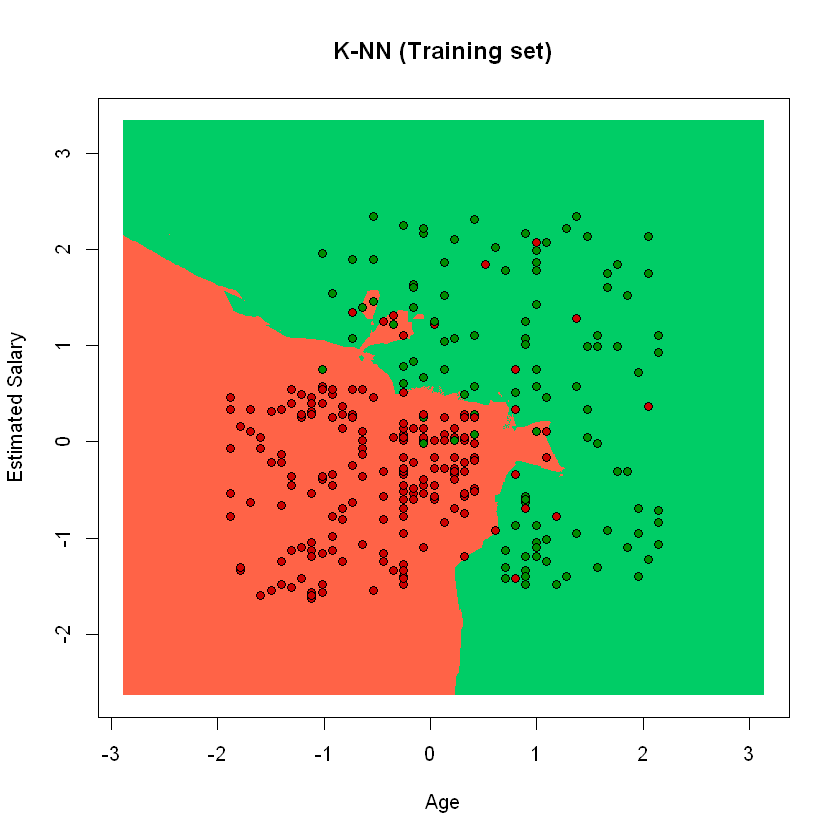

In [8]:
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = knn(train = training_set[, -3], test = grid_set, cl = training_set[, 3], k = 5)
plot(set[, -3],
     main = 'K-NN (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

Visualising the Test set results

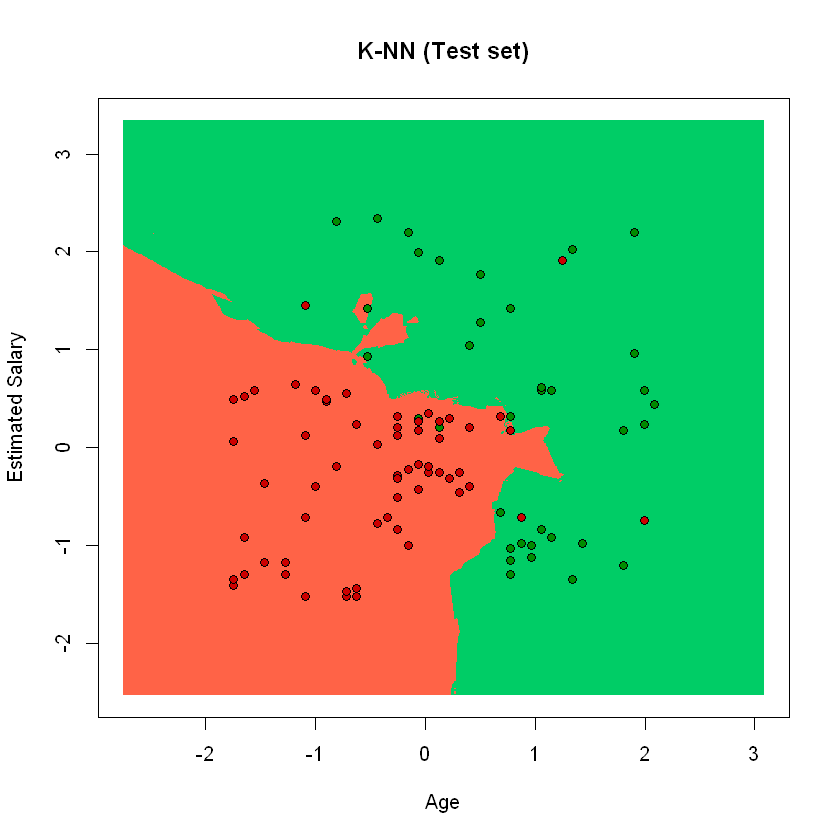

In [9]:
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = knn(train = training_set[, -3], test = grid_set, cl = training_set[, 3], k = 5)
plot(set[, -3],
     main = 'K-NN (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))